Com o crescimento das plataformas de streaming, grandes volumes de dados musicais passaram a ser gerados, possibilitando análises mais aprofundadas sobre as características das músicas e seus padrões de similaridade. Nesse contexto, técnicas de aprendizado não supervisionado tornam-se ferramentas importantes para identificar estruturas ocultas nos dados, permitindo agrupar músicas com perfis acústicos semelhantes sem a necessidade de rótulos pré-definidos.

# Realizando o Método por Agrupamento

Este notebook traz um exemplo básico de como executar um algoritmo de agrupamento.

## Importando módulos

Vamos utilizar poucos módulos para esta primeira parte. O `pandas` para tratar os dados como dataframes, o `matplotlib` para conseguir plotar alguns gráficos e o `gdown` para baixar a base de dados.

In [ ]:
# pandas para usar dataframes
import pandas as pd
# matplotlib para plotar gráficos
import matplotlib.pyplot as plt
# gdown para baixar os dados
import gdown
# Importa os métodos linkage e dendrogram para construir a estrutura hierárquica
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from matplotlib.lines import Line2D
import numpy as np

Alguns outros módulos vão ser importados depois a medida que forem necessários.

In [ ]:
# url da base de dados
url = 'https://drive.google.com/file/d/1J_VAbjM5Gdad-ZFYn5DEtd4gWB-bG0MC/view?usp=sharing'
# nome do arquivo que vai ser gerado
output = 'spotify-songs.csv'
# baixa os dados
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1J_VAbjM5Gdad-ZFYn5DEtd4gWB-bG0MC
To: /content/spotify-songs.csv
100%|██████████| 7.97M/7.97M [00:00<00:00, 120MB/s]


'spotify-songs.csv'

Depois de carregar os dados, vamos verificar quantos objetos, atributos e quais são os seus tipos. Além de verificar quanto de Memoria RAM o Dataset consome.

In [ ]:
dataset = pd.read_csv('spotify-songs.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

Podemos ver que o conjunto de dados possui 23 atributos, relacionados principalmente a informações descritivas das faixas musicais e a características acústicas extraídas das músicas.

**Os atributos se dividem em três grupos principais**:

**Atributos categóricos (object)**, que descrevem informações textuais como identificadores da faixa, nome da música, artista, álbum, playlist e gêneros musicais.

**Atributos numéricos inteiros (int64)**, que representam valores discretos, como popularidade da faixa, tonalidade (key), modo (mode) e duração em milissegundos.

**Atributos numéricos contínuos (float64)**, que correspondem às características acústicas das músicas, como danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence e tempo.

A maior parte dos atributos numéricos estão relacionado à análise de áudio, fornecendo uma descrição quantitativa do comportamento musical das faixas.

In [ ]:
dataset.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Agrupamento inicial

Podemos iniciar a análise fazendo um agrupamento inicial por meio de algoritmo hierárquico. Essa etapa pode fornecer alguns _insights_ sobre a distribuição dos objetos.

o `scipy` possui uma implementação do algoritmo hierárquico, mais especificamente da função de _linkage_ do algoritmo para conseguir agrupar os dados de acordo com o tipo de ligação feita para unir os grupos. O mesmo pacote fornece uma função para plotar o dendrograma da estrutura hierárquica gerada.

Para fins de exemplo, vamos iniciar com uma similaridade baseada no cosseno e usando a ligação média entre os grupos.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Define a lista de características a serem descritas, reutilizando a lista 'caracteristicas' da execução anterior.
caracteristicas = [
    'danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'tempo', 'loudness', 'speechiness', 'liveness'
]

dataset_popularity = dataset.copy()
Y = dataset_popularity[caracteristicas]

scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)

dataset = dataset[caracteristicas]
dataset.head()

,danceability,energy,valence,acousticness,instrumentalness,tempo,loudness,speechiness,liveness
0,0.748,0.916,0.518,0.1020,0.000000,122.036,-2.634,0.0583,0.0653
1,0.726,0.815,0.693,0.0724,0.004210,99.972,-4.969,0.0373,0.3570
2,0.675,0.931,0.613,0.0794,0.000023,124.008,-3.432,0.0742,0.1100
3,0.718,0.930,0.277,0.0287,0.000009,121.956,-3.778,0.1020,0.2040
4,0.650,0.833,0.725,0.0803,0.000000,123.976,-4.672,0.0359,0.0833


In [ ]:
# Conversão para matriz numérica
X = dataset.values

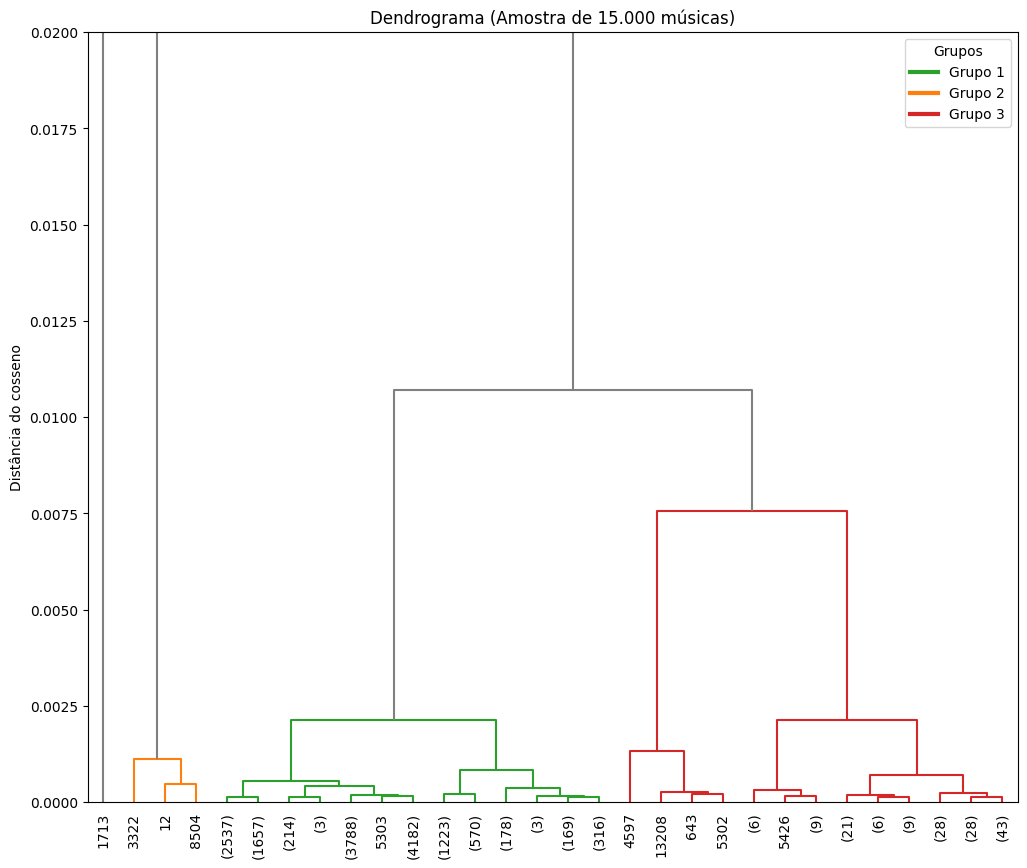

In [ ]:
# Assegurando que o 'dataset' e 'caracteristicas' estejam bem definidos
try:
    _ = dataset.head()
    _ = caracteristicas
except NameError:
    dataset = pd.read_csv('spotify-songs.csv')
    caracteristicas = [
        'danceability', 'energy', 'valence', 'acousticness',
        'instrumentalness', 'tempo', 'loudness',
        'speechiness', 'liveness'
    ]
    dataset = dataset[caracteristicas]

# Amostragem aleatória reprodutível
sample_size = 15000
dataset_sample = dataset.sample(
    n=sample_size,
    random_state=42
)


# Matriz numérica
X_sample = dataset_sample[caracteristicas].values

# Distância do cosseno
distance_matrix = pdist(X_sample, metric='cosine')

# Agrupamento hierárquico
mergings = linkage(distance_matrix, method='average')

# Dendrograma
plt.figure(figsize=(12, 10))

# Ponto de corte para cores
color_threshold = 0.01

dendro = dendrogram(
    mergings,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90,
    color_threshold=color_threshold,
    above_threshold_color='gray'
)

plt.title("Dendrograma (Amostra de 15.000 músicas)")
plt.ylabel("Distância do cosseno")

# Zoom na parte inferior
plt.ylim(0, 0.02)

# Legenda manual dos grupos
colors = set(dendro['color_list'])
colors.discard('gray')

legend_elements = [
    Line2D([0], [0], color=c, lw=3, label=f'Grupo {i+1}')
    for i, c in enumerate(colors)
]

plt.legend(
    handles=legend_elements,
    title="Grupos",
    loc="upper right"
)

plt.show()

Inicialmente, o código garante que o conjunto de dados (dataset) e a lista de características acústicas (caracteristicas) estejam definidos. Para isso, utiliza-se um bloco **try/except**, que verifica se essas variáveis já existem no ambiente. Caso contrário, o arquivo spotify-songs.csv é carregado e apenas as variáveis numéricas é relacionadas às características acústicas das músicas são selecionadas.

Em seguida, é realizada uma amostragem aleatória reprodutível do conjunto de dados original. O parâmetro random_state=42 assegura que a mesma amostra seja obtida em execuções diferentes, o que é importante para fins de reprodutibilidade dos resultados. No total, são selecionadas 15.000 músicas para análise, pois, ao carregar toda a base de dados consumia toda a memoria RAM do colab, por isso foi utilizado essa estrategia de reduzir pela metade a quandidade de musicas, de forma aleatória.

Após a amostragem, os dados são convertidos para uma matriz numérica (X_sample), contendo apenas as características acústicas selecionadas. Com base nessa matriz, calcula-se a distância do cosseno entre as músicas por meio da função pdist. Essa medida é equivalente a
1
−
cosine similarity
1−cosine similarity e é adequada para avaliar a similaridade entre vetores multidimensionais, como no caso das características musicais.

A partir da matriz de distâncias, aplica-se o agrupamento hierárquico aglomerativo, utilizando o método de ligação média (average linkage). Esse método define a distância entre dois grupos como a média das distâncias entre todos os pares de elementos pertencentes a esses grupos.

Para a visualização dos resultados, é construído um dendrograma, que representa graficamente a hierarquia de agrupamento. Como o conjunto de dados é grande, utiliza-se o parâmetro truncate_mode='lastp', exibindo apenas os últimos 30 agrupamentos formados, o que torna a visualização mais legível.

Além disso, define-se um limiar de corte (color_threshold) na distância do cosseno. Abaixo desse limiar, os agrupamentos recebem cores diferentes, enquanto os ramos acima do corte são exibidos em cinza, destacando a estrutura hierárquica global. Esse recurso facilita a identificação visual de grupos distintos.

O eixo vertical do gráfico é ajustado manualmente (plt.ylim) para ampliar a região inferior do dendrograma, onde se concentram as menores distâncias, tornando as diferenças entre os grupos mais perceptíveis.

## Definindo número de grupos

Podemos simplesmente encerrar a análise e utilizar os grupos com base no agrupamento hierárquico anterior. Mas, podemos também utilizar outros recursos que ajudam na etapa de interpretação dos dados.

Vamos inicialmente, tentar descobrir qual o número de grupos mais adequado para dividir os dados.

Para isso, vamos fazer uso de um índice relativo para medir o quão compacto os grupos estão (o erro quadrático médio, nesse caso). De posse desse índice, podemos dividir os dados em variados números de grupos e verificar o comportamento do índice para tentar obter um valor adequado.

Vale salientar que esse índice (assim como outros) tende a ser, em geral, monotônico. Isso é natural, já que quanto mais grupos geramos, mais compactos são. Então, devemos ficar atentos a pontos de mudança de comportamento ao invés de olhar simplesmente o mínimo.

Como queremos fazer uma divisão com quantidades de grupos diferentes, podemos automatizar esse processo utilizando o algoritmo k-means.

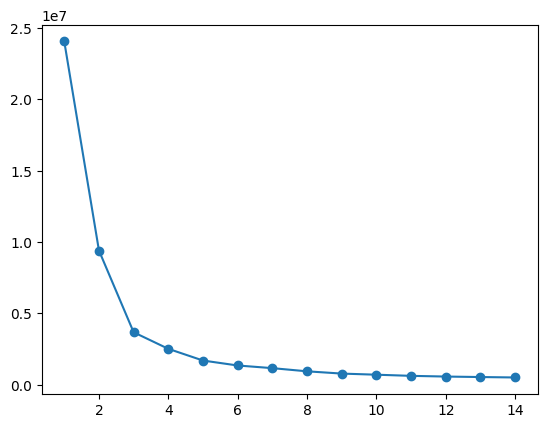

In [ ]:
# importando algoritmo k-means
from sklearn.cluster import KMeans
%matplotlib inline

# quantidade de grupos que vamos realizar os testes
ks = range(1, 15)
# armazena o valor do índice para cada partição gerada
inertias = []
for k in ks:
  # executa o k-means para aquela quantidade de grupos
  km = KMeans(n_clusters=k, random_state=8, n_init='auto')
  # aplica a configuração do agrupamento gerado aos dados para obter o índice
  km.fit(dataset)
  # calcula o erro quadrático médio
  inertias.append(km.inertia_)
# plota o gráfico
plt.plot(ks, inertias, marker='o')

Conforme esperado, o índice decresce continuamente. No entanto, existem alguns locais que chamam a atenção:

1. uma grande queda de um grupo para dois, o que é esperado;
2. uma redução da magnitude da queda após 4 grupos.
3. uma pequena queda mais significativa, após a curva iniciar seu decrescimo constante, com 7 grupos.

Apesar de serem somente indícios, é um bom início para analisar os dados.

Se não ficar tão clara a diferença entre os valores, é possível plotar a diferença percentual entre um número de grupos e outro.

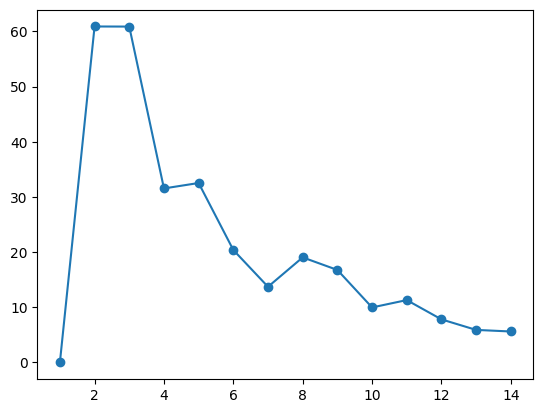

In [ ]:
diff = [(1 - (inertias[i] / inertias[i-1]))*100 if i > 0 else 0 for i in range(0,len(inertias))]
plt.plot(range(1,len(diff)+1), diff, marker='o')


Uma outra análise a ser feita é a distribuição da quantidade de objetos em cada grupo a medida que vamos aumentando a quantidade desses grupos.

Essa análise fornece uma visão de quão homogêneos alguns grupos são com relação a outros. Por exemplo, se um grupo tende a não ser dividido quando aumentamos o número total de grupos, pode significar que existe uma certa homogeneidade dos objetos dentro daquele grupo.

Vamos fazer um experimento semalhentes ao anterior, mas olhando para a quantidade de objetos em cada grupo a medida que aumentamos a quantidade total de grupos na partição (note que os numeros que representam os grupos não são os mesmos entre uma execução e outra).

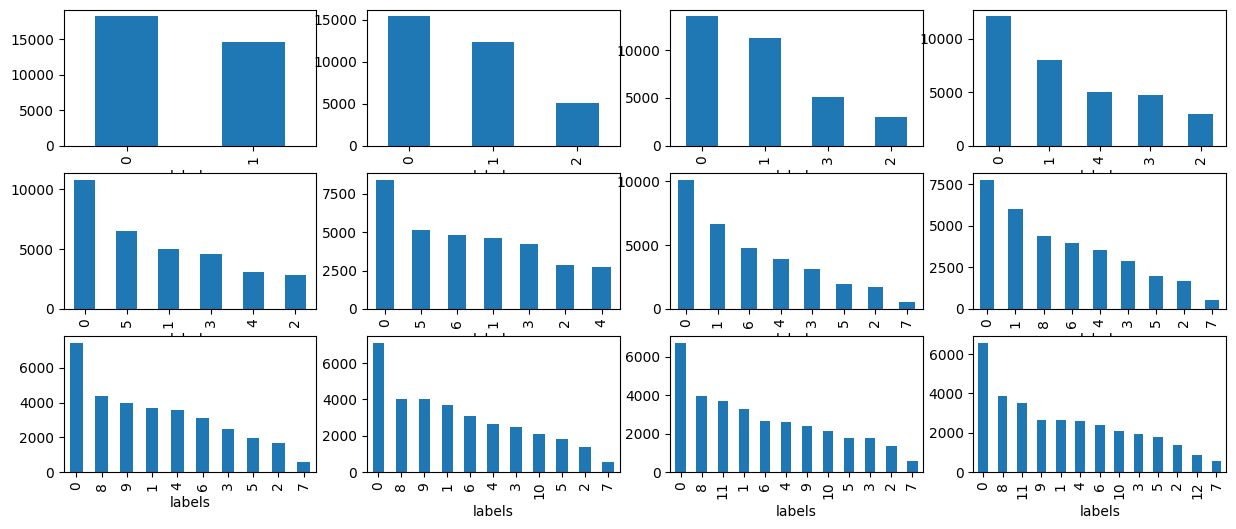

In [ ]:
# configuração do gráfico que vai ser gerado
fig, axs = plt.subplots(3,4, figsize=(15, 6), facecolor='w', edgecolor='k')
axs = axs.ravel()

# dataframe para armazenar os dados
df = pd.DataFrame()

# intervalo com a quantidade de grupos que vamos dividir os dados
ks = range(2, 14)
for k in ks:
  # executa o kmeans para cada quantidade de grupos
  km = KMeans(n_clusters=k, random_state=8, n_init='auto')
  # relaciona o resultado gerado com os dados da base
  km.fit(dataset)
  # resgata os rótulos (grupos) para cada objeto da base
  labels = km.labels_.tolist()
  # cria um dataframe para facilitar a contagem dos objetos em cada grupo
  df['labels'] = labels
  # plota a quantidade de objetos em cada grupo
  df['labels'].value_counts().plot(kind='bar',ax=axs[k-2])

O PCA foi utilizado como técnica de redução de dimensionalidade com o objetivo de viabilizar a visualização dos dados em duas dimensões. A escolha do método se justifica por sua capacidade de preservar a maior parte da variância dos dados originais, reduzindo redundâncias causadas por correlação entre atributos musicais, além de manter interpretabilidade, característica importante em análises exploratórias.

<Axes: xlabel='pca1', ylabel='pca2'>

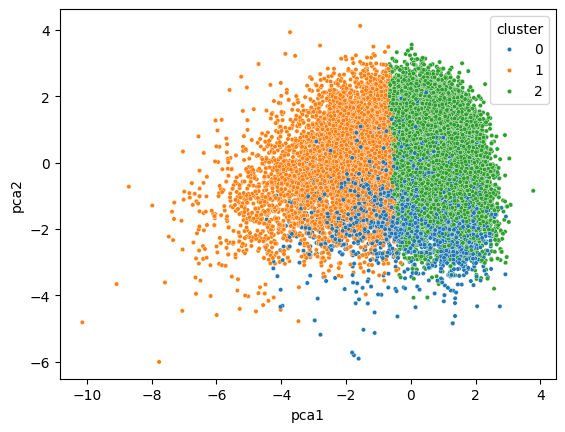

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns


kmeans = KMeans(n_clusters=3, random_state=8)
dataset_popularity["cluster"] = kmeans.fit_predict(Y_scaled)

pca = PCA(n_components=2)
pca_coords = pca.fit_transform(Y_scaled)

dataset_popularity["pca1"] = pca_coords[:,0]
dataset_popularity["pca2"] = pca_coords[:,1]

sns.scatterplot(data=dataset_popularity, x="pca1", y="pca2", hue="cluster", palette="tab10", s=10)

In [ ]:
# executando k-means com dois grupos
km = KMeans(n_clusters=2, random_state=8)
km.fit(dataset)
# obtendo os dois centroides
centers = km.cluster_centers_
# imprimindo os valores dos centroides
print(centers)

[[ 6.38151641e-01  7.28936315e-01  4.87835328e-01  1.46650727e-01
   1.10394622e-01  1.39828445e+02 -6.42339108e+00  1.04114473e-01
   1.95534762e-01]
 [ 6.75599829e-01  6.60944545e-01  5.38801935e-01  2.10977814e-01
   5.28752860e-02  9.73354711e+01 -7.08747001e+00  1.10738477e-01
   1.83517152e-01]]


Devido à natureza contínua e altamente correlacionada das **características musicais**, o conjunto de dados **não apresenta** fronteiras de agrupamento bem definidas, admitindo **múltiplas partições** plausíveis. Como consequência, o algoritmo K-Means, por se tratar de um método baseado em otimização local, pode convergir para diferentes soluções estáveis dependendo da inicialização dos centroides, todas com valores de inércia semelhantes.

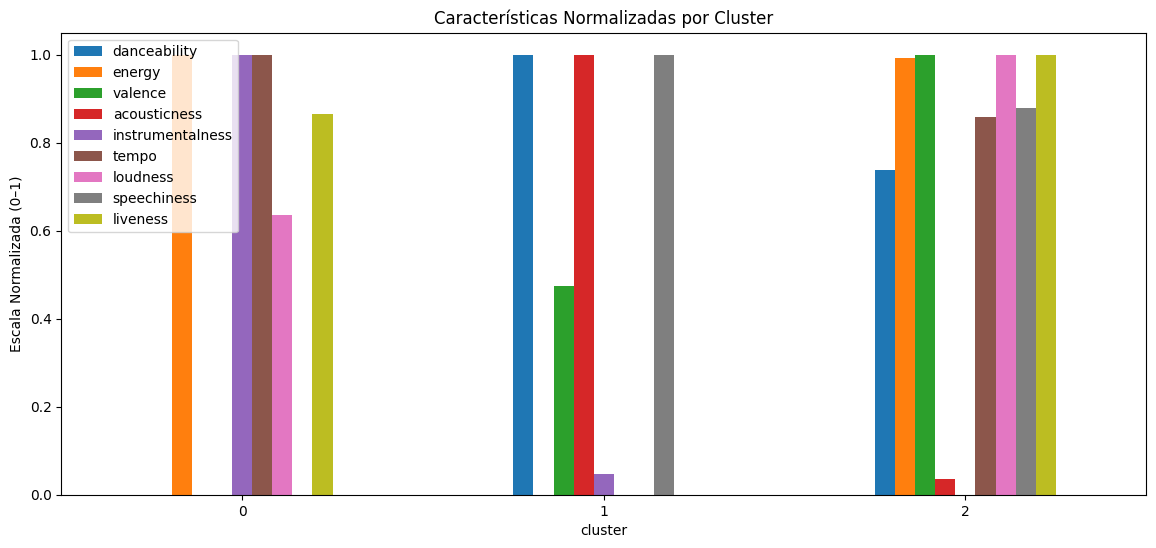

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cluster_means = dataset_popularity.groupby("cluster")[caracteristicas].mean()

cluster_means_norm = pd.DataFrame(
    scaler.fit_transform(cluster_means),
    columns=cluster_means.columns,
    index=cluster_means.index
)

cluster_means_norm.plot(kind='bar', figsize=(14,6))
plt.title("Características Normalizadas por Cluster")
plt.ylabel("Escala Normalizada (0–1)")
plt.xticks(rotation=0)
plt.show()

In [ ]:
cluster_means_norm

,danceability,energy,valence,acousticness,instrumentalness,tempo,loudness,speechiness,liveness
cluster,,,,,,,,,
0,0.000000,1.000000,0.00000,0.000000,1.00000,1.000000,0.635796,0.000000,0.864791
1,1.000000,0.000000,0.47343,1.000000,0.04769,0.000000,0.000000,1.000000,0.000000
2,0.738388,0.991545,1.00000,0.035613,0.00000,0.858665,1.000000,0.879715,1.000000


Os valores apresentados no gráfico estão normalizados por característica, de modo que o valor mínimo (0) representa o cluster com menor média relativa naquela dimensão, e não a ausência absoluta da característica.

In [ ]:
cluster_profile = dataset_popularity.groupby("cluster")[caracteristicas].mean()
display(cluster_profile)

,danceability,energy,valence,acousticness,instrumentalness,tempo,loudness,speechiness,liveness
cluster,,,,,,,,,
0,0.651255,0.777107,0.381957,0.089404,0.729667,125.286511,-7.019239,0.073118,0.196562
1,0.656088,0.483274,0.460334,0.391071,0.048846,112.837856,-9.684890,0.113727,0.156529
2,0.654824,0.774623,0.547509,0.100147,0.014751,123.527085,-5.492272,0.108842,0.202821


A análise de clustering revelou a existência de três perfis sonoros distintos no conjunto de dados. Um cluster é caracterizado por músicas predominantemente instrumentais e energéticas, outro por faixas acústicas e vocais com menor intensidade sonora, e um terceiro por músicas vocais, energéticas e emocionalmente positivas, típicas do pop contemporâneo. Esses resultados indicam que as características sonoras permitem identificar estilos musicais latentes, embora não sejam suficientes para determinar, isoladamente, o sucesso comercial das músicas.

Em um primeiro momento, os dados mostrados não informam muita coisa. Mas, vamos lembrar que os centroides são calculados a partir do valor médio de todos os pontos de um grupo. Então, é muito provável que o centroide seja um ponto no espaço de características, mas não um objeto em si. Por isso, os dados mostrados podem não fazer muito sentido (a maioria das características são binários e temos valores bastante diferentes de 0s e 1s).

Para fazer mais sentido, vamos realizar uma aproximação dos valores para algo mais próximo ao que se é esperado de um objeto desse conjunto de dados. Ou seja, um simples arredondamento desses valores deve resolver o problema de compreensão.

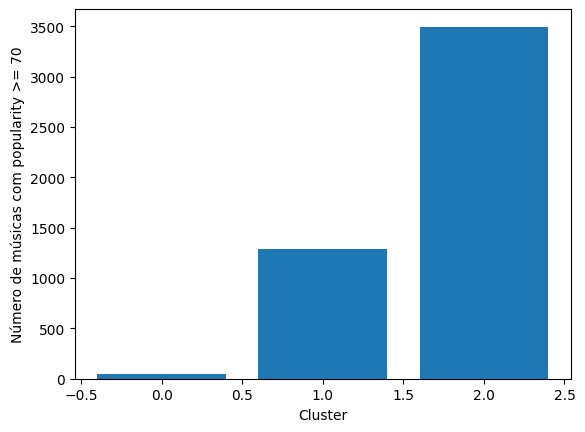

In [ ]:
count = dataset_popularity[dataset_popularity["track_popularity"] >= 70].groupby("cluster").size()
plt.bar(count.index, count.values)
plt.xlabel("Cluster")
plt.ylabel("Número de músicas com popularity >= 70")
plt.show()

In [ ]:
# arredondando os valores das features e representando como inteiro para facilitar a visualização
centroids = pd.DataFrame(centers.round().astype(int))
# imprimindo os títulos das colunas
centroids.columns = dataset.keys().values
centroids.head()

,danceability,energy,valence,acousticness,instrumentalness,tempo,loudness,speechiness,liveness
0,1,1,0,0,0,140,-6,0,0
1,1,1,1,0,0,97,-7,0,0


O objetivo principal da celula acima é simplificar a visualização e interpretação dos centroides dos clusters.

centroids = pd.DataFrame(centers.round().astype(int)):

**centers.round()**: Arredonda os valores numéricos dos centroides (que são originalmente floats) para o número inteiro mais próximo.
Isso é feito para tornar os valores mais compreensíveis, especialmente para características que podem ser interpretadas como discretas ou binárias no contexto original do problema.

**.astype(int)**: Converte os valores arredondados para o tipo inteiro. Isso garante que os centroides sejam exibidos sem casas decimais.

**pd.DataFrame(...)**: Cria um novo DataFrame do pandas com esses valores arredondados e convertidos, tornando-o mais fácil de manipular e exibir.

**centroids.columns = dataset.keys().values**:

Esta linha atribui os nomes das colunas do DataFrame dataset (que são os nomes das características) ao novo DataFrame centroids. Isso é crucial para entender a qual característica cada valor de centroide arredondado corresponde.

**centroids.head()**: Exibe as primeiras linhas do DataFrame centroids. Como neste caso cada linha representa um centroide de um cluster, **.head()** mostrará todos os centroides calculados, com seus valores de características arredondados e as colunas nomeadas corretamente.

In [ ]:
# Aplicando o KMeans = 3
km = KMeans(n_clusters=3, random_state=8)
km.fit(dataset)
centers = km.cluster_centers_
centroids = pd.DataFrame(centers.round().astype(int))
centroids.columns = dataset.keys().values
centroids.head()

,danceability,energy,valence,acousticness,instrumentalness,tempo,loudness,speechiness,liveness
0,1,1,0,0,0,127,-7,0,0
1,1,1,1,0,0,94,-7,0,0
2,1,1,1,0,0,167,-6,0,0


O resultado obtido do DataFrame (centroids), mostra os centroides arredondados para os três clusters que o algoritmo K-Means encontrou. Cada linha representa um cluster, e cada coluna representa uma característica musical.

Ou seja,

**Cluster 0**:

danceability: 1 (alta)

energy: 1 (alta)

valence: 0 (baixa/neutra)

acousticness: 0 (baixa)

instrumentalness: 0 (baixa)

tempo: 127 (moderado-alto)

loudness: -7 (média)

speechiness: 0 (baixa)

liveness: 0 (baixa)

Interpretamos da seguinte forma: Este cluster parece representar músicas com alta dançabilidade e energia, mas com um valência mais neutra ou até um pouco negativa. São músicas não-acústicas, com pouca instrumentalidade, tempo moderado-alto e loudness média. Isso pode indicar um grupo de músicas de pop/eletrônicas mais sérias ou introspectivas.

**Cluster 1**:

danceability: 1 (alta)

energy: 1 (alta)

valence: 1 (alta)

acousticness: 0 (baixa)

instrumentalness: 0 (baixa)

tempo: 94 (moderado-baixo)

loudness: -7 (média)

speechiness: 0 (baixa)

liveness: 0 (baixa)

Interpretamos da seguinte forma: Este cluster também tem alta dançabilidade e energia, mas se diferencia pelo alto valor de valência, sugerindo músicas com emoções mais positivas. O tempo é mais lento que o Cluster 0. Isso pode caracterizar músicas de pop/dance alegres e animadas.

**Cluster 2**:

danceability: 1 (alta)

energy: 1 (alta)

valence: 1 (alta)

acousticness: 0 (baixa)

instrumentalness: 0 (baixa)

tempo: 167 (alto)

loudness: -6 (alta)

speechiness: 0 (baixa)

liveness: 0 (baixa)

Interpretamos da seguinte forma: Este cluster é marcado por alta dançabilidade, energia e valência positiva, e se destaca pelo tempo muito alto e maior loudness. Isso pode indicar músicas muito energéticas, rápidas e alegres, talvez de gêneros como eletrônica acelerada, dance ou pop com batidas rápidas.

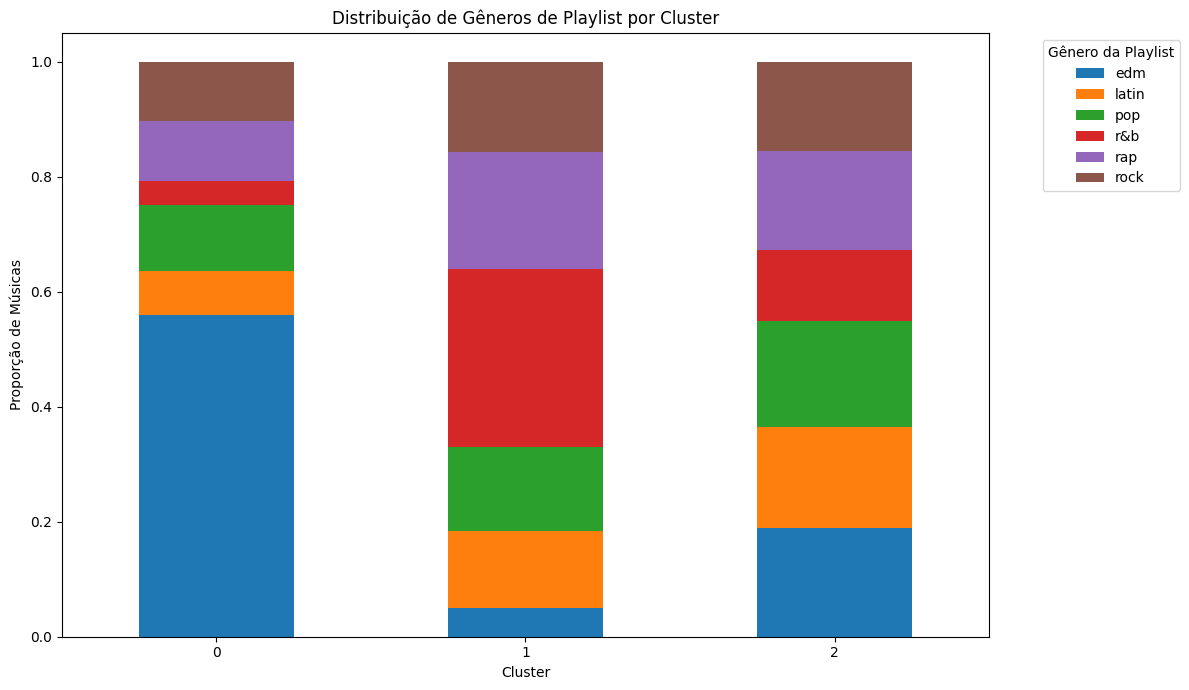

In [ ]:
genre_distribution = dataset_popularity.groupby(['cluster', 'playlist_genre']).size().unstack(fill_value=0)

# Normalize the data to show proportions within each cluster
genre_distribution_norm = genre_distribution.div(genre_distribution.sum(axis=1), axis=0)

# Plotting the distribution
fig, ax = plt.subplots(figsize=(12, 7))
genre_distribution_norm.plot(kind='bar', stacked=True, ax=ax)

plt.title('Distribuição de Gêneros de Playlist por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporção de Músicas')
plt.xticks(rotation=0)
plt.legend(title='Gênero da Playlist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
km = KMeans(n_clusters=4, random_state=8)
km.fit(dataset)
centers = km.cluster_centers_
centroids = pd.DataFrame(centers.round().astype(int))
centroids.columns = dataset.keys().values
centroids.head()

,danceability,energy,valence,acousticness,instrumentalness,tempo,loudness,speechiness,liveness
0,1,1,0,0,0,123,-6,0,0
1,1,1,1,0,0,93,-7,0,0
2,1,1,1,0,0,177,-6,0,0
3,1,1,0,0,0,146,-7,0,0


In [ ]:
km = KMeans(n_clusters=5, random_state=8)
km.fit(dataset)
centers = km.cluster_centers_
centroids = pd.DataFrame(centers.round().astype(int))
centroids.columns = dataset.keys().values
centroids.head()

,danceability,energy,valence,acousticness,instrumentalness,tempo,loudness,speechiness
0,1,1,0,0,0,125,-6,0
1,1,1,1,0,0,102,-7,0
2,1,1,1,0,0,177,-6,0
3,1,1,0,0,0,147,-7,0
4,1,1,1,0,0,84,-8,0


In [ ]:
dataset[km.labels_ == 2]

,danceability,energy,valence,acousticness,instrumentalness,tempo,loudness,speechiness
82,0.362,0.921,0.529,0.12300,0.000000,172.191,-3.815,0.4860
299,0.430,0.606,0.123,0.13100,0.000000,169.988,-5.115,0.0431
313,0.445,0.597,0.263,0.15800,0.000002,175.903,-6.724,0.0575
396,0.567,0.865,0.838,0.01270,0.000000,187.981,-5.125,0.1390
402,0.425,0.560,0.347,0.08260,0.000000,168.068,-6.395,0.3080
...,...,...,...,...,...,...,...,...
32420,0.471,0.891,0.309,0.02640,0.000003,174.012,-3.047,0.0632
32492,0.527,0.883,0.745,0.06260,0.000000,163.007,-2.915,0.0732
32546,0.388,0.971,0.175,0.00143,0.091000,194.956,-2.274,0.1490
32583,0.673,0.733,0.261,0.13800,0.701000,194.050,-9.856,0.1170


In [ ]:
from IPython.display import display

ks = range(6, 10)
for k in ks:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(dataset)
    centers = km.cluster_centers_
    centroids = pd.DataFrame(centers.round().astype(int))
    centroids.columns = dataset.keys().values
    display(centroids)

,danceability,energy,valence,acousticness,instrumentalness,tempo,loudness,speechiness
0,1,1,1,0,0,110,-7,0
1,1,1,0,0,0,148,-7,0
2,1,1,0,0,0,126,-6,0
3,1,1,1,0,0,177,-6,0
4,1,1,1,0,0,95,-7,0
5,1,1,0,0,0,80,-8,0


,danceability,energy,valence,acousticness,instrumentalness,tempo,loudness,speechiness
0,1,1,1,0,0,111,-7,0
1,1,1,1,0,0,183,-6,0
2,1,1,1,0,0,96,-7,0
3,1,1,0,0,0,143,-7,0
4,1,1,0,0,0,126,-6,0
5,1,1,0,0,0,80,-8,0
6,1,1,1,0,0,163,-7,0


,danceability,energy,valence,acousticness,instrumentalness,tempo,loudness,speechiness
0,1,1,0,0,0,125,-6,0
1,1,1,0,0,0,80,-8,0
2,1,1,1,0,0,95,-7,0
3,1,1,1,0,0,173,-6,0
4,1,1,1,0,0,110,-7,0
5,1,1,0,0,0,139,-7,0
6,1,1,1,0,0,154,-7,0
7,1,1,1,0,0,193,-7,0


,danceability,energy,valence,acousticness,instrumentalness,tempo,loudness,speechiness
0,1,1,0,0,0,127,-6,0
1,1,1,1,0,0,93,-7,0
2,1,1,1,0,0,173,-6,0
3,1,1,1,0,0,104,-7,0
4,1,1,1,0,0,154,-7,0
5,1,1,1,0,0,193,-7,0
6,1,1,0,0,0,79,-8,0
7,1,1,1,0,0,118,-7,0
8,1,1,0,0,0,140,-7,0
